## 8.1 대회 분석
- 운전자가 보험금을 청구할 확률 예측
- 고객 특정 할 수 없을 정도로 비식별화 & 결측값 많음

## 8.2 탐색적 데이터 분석
### 8.2.1 데이터 둘러보기
- ps_[분류]_[분류별 일련번호]_[데이터종류]
- 분류, 일련번호에서는 정보가 없음
- 결측값이 -1로 입력되어 있음 : missingno 패키지 이용 => 

In [1]:
import pandas as pd

path = 'data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(path + "train.csv", index_col='id')
test = pd.read_csv(path + "test.csv", index_col='id')
submission = pd.read_csv(path + "sample_submission.csv", index_col='id')

print(train.shape, test.shape)

(595212, 58) (892816, 57)


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

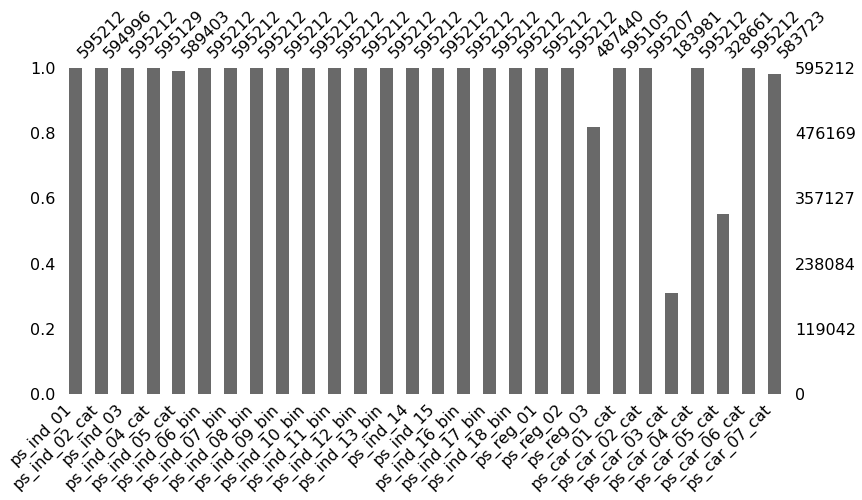

In [3]:
import numpy as np
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN)
msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6));

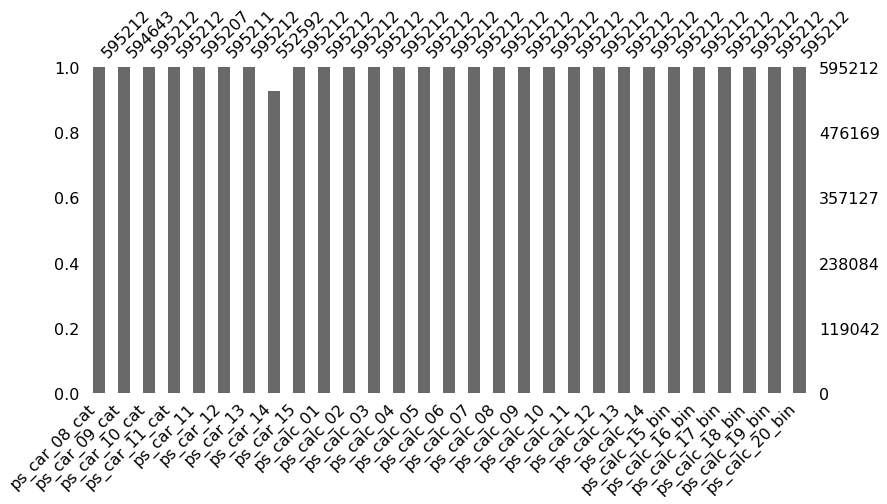

In [4]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

In [5]:
# 피쳐 요약표

def resumetable(df):
    print(f"dataset shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 갯수'] = (df == -1).sum().values
    summary['고윳값 갯수'] = df.nunique().values
    summary['데이터 종류'] = None
    
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col,'데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col,'데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col,'데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col,'데이터 종류'] = '순서형'
    
    return summary

summary = resumetable(train)
summary

dataset shape: (595212, 58)


,데이터 타입,결측값 갯수,고윳값 갯수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


### 8.2.2 데이터 시각화
타깃값 분포 : 사고는 자주 일어나지 않으므로 불균형 => 각 피쳐의 고윳값 별 타겟 1 비율 필요 => 고윳값 별로 타겟 1 비율이 똑같거나 통계적 유효성이 떨어지면 예측에 도움이 되지 않음 & 신뢰구간이 좁으면 통계적으로 유효. 

**고유값 별 타깃값 1 비율이 충분히 차이가 나고 신뢰구간도 작은 피쳐**


In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

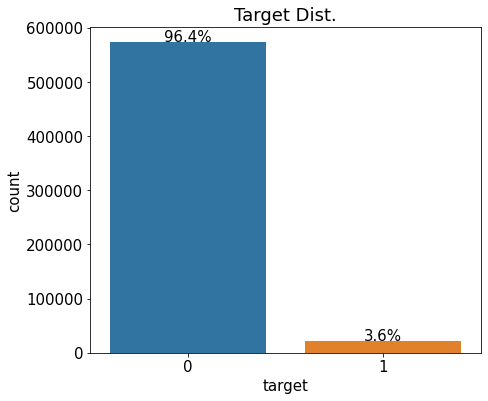

In [7]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord + width/2.0,
               height + total_size*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')

mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train);
write_percent(ax, len(train))
ax.set_title('Target Dist.');

이진 피쳐
- ps_ind_06_bin : 고윳값 별 타깃값 비율 다르고, 신뢰구간도 좁다
- ps_ind_10~13_bin : 신뢰구간이 넓음
- ps_calc_15~20_bin : 고윳값 별 타깃값 비율 차이가 없음

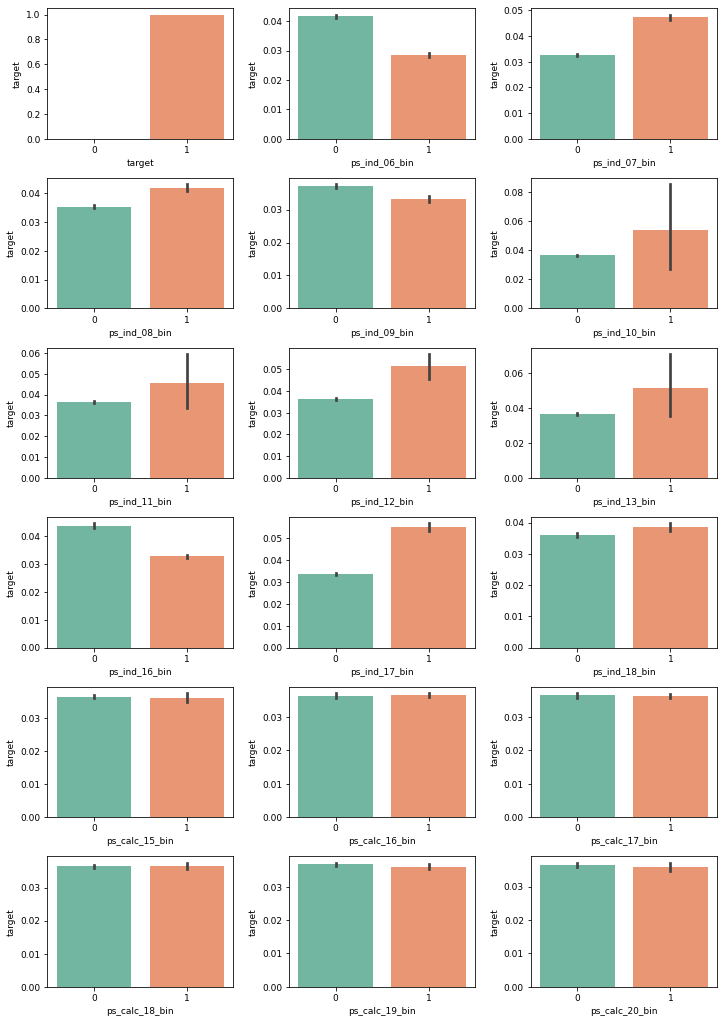

In [8]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette = 'Set2', ax=ax)
        
bin_features = summary.loc[summary['데이터 종류'] == '이진형'].index

plot_target_ratio_by_features(train, bin_features, 6, 3)

명목형 피쳐
- -1을 포함한 피쳐도 많음. 결측값 : 많지 않다면 다른 값으로 대체하고, 많으면 해당 피쳐 자체 제거 / 결측값 자체가 타깃값 예측에 도움을 줄 수도 있다
- ps_ind_02_cat : -1이 다른 고윳값 보다 타깃값 1 비율이 큼. 이런 상황에서 결측치 대체시 나빠질 수 있음 => 결측값 자체가 예측력 존재
- ps_car_02_cat : -1 일 때 타깃값 1 비율 0% => -1 일 경우 타깃값 0
- ps_ind_02_cat, ps_ind_04_cat, ps_car_01_cat : -1 제외 나머지 고윳값은 타깃값 1 비율 비슷하며, -1일 때 신뢰구간이 상대적으로 넓음. 그렇지만 -1의 신뢰하한과 다른 고윳값들의 신뢰상한 간 차기가 큼 => -1과 다른 고윳값들 간 타깃값 1 비율에 차이가 있음
- ps_car_10_cat : 세 고윳값 1 평균 비율 비슷, 신뢰구간 넓은 것 있음. 넣으나 마나는 본인 판단

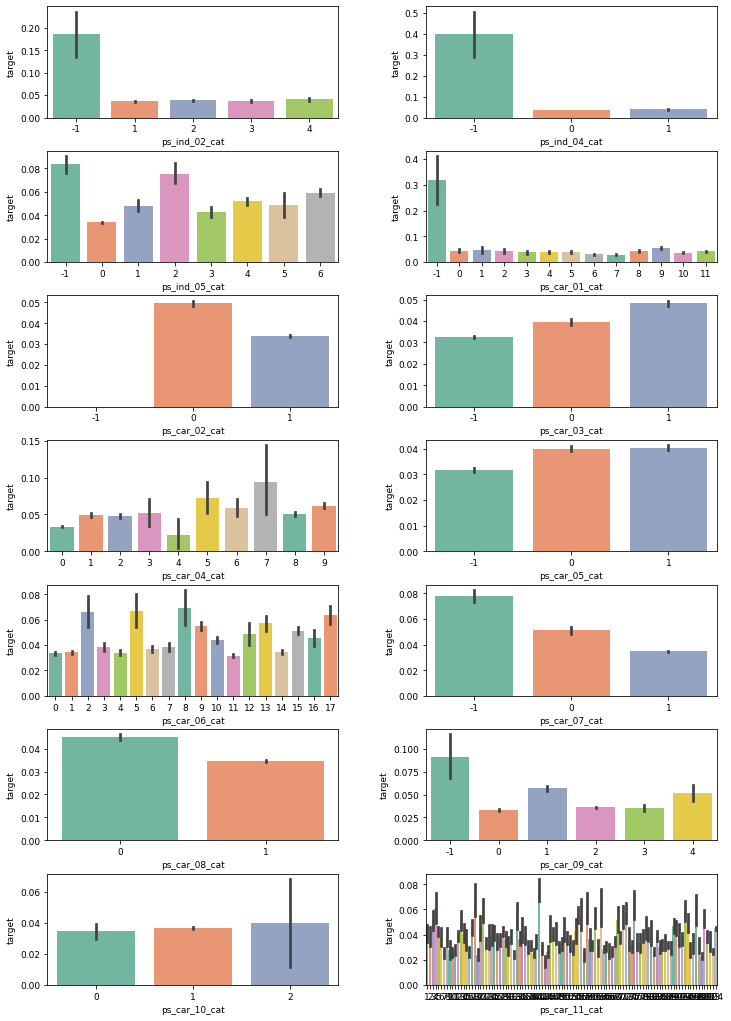

In [9]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index

plot_target_ratio_by_features(train, nom_features,7,2)

순서형 피쳐
- ps_ind_14 : 타깃값 비율 동등 및 신뢰구간 넓음
- ps_calc_04~14 : 타깃값 비율 비슷 & 다른 고윳값은 신뢰구간이 넓어 모두 제거

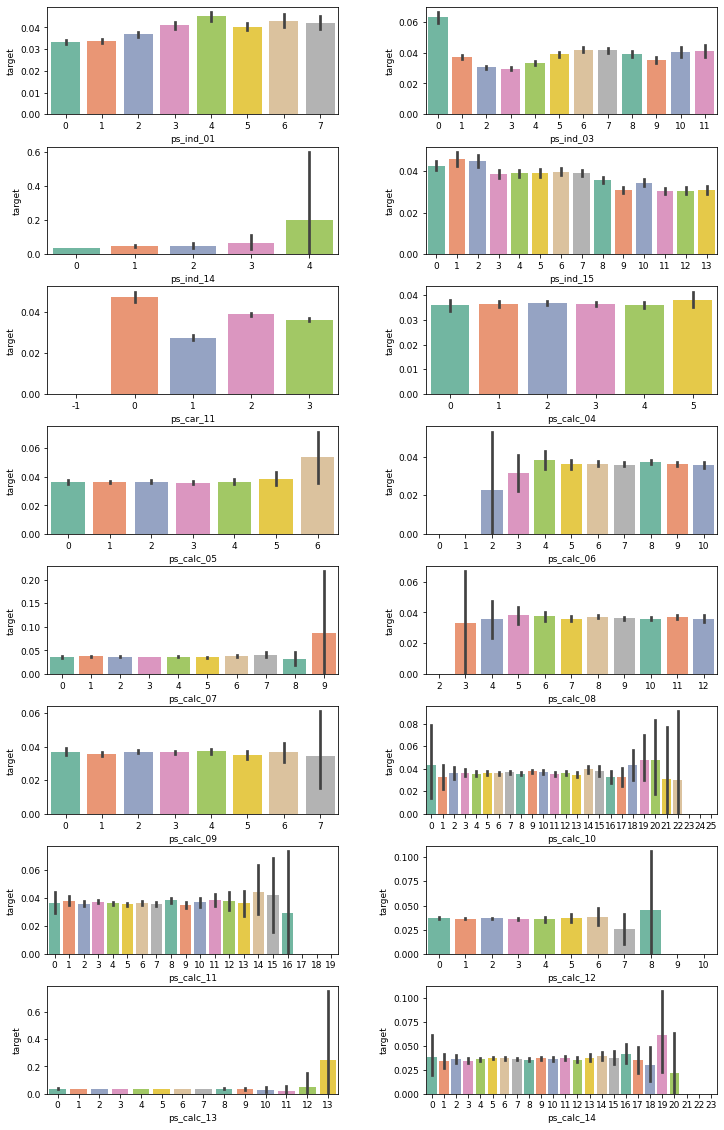

In [10]:
ord_features = summary.loc[summary['데이터 종류'] == '순서형'].index

plot_target_ratio_by_features(train, ord_features, 8, 2, (12,20))

연속형 피쳐
- 고윳값이 굉장히많아서 몇 개의 구간으로 나눠 비율 알아보기 : pd.cut
- ps_calc_01~03 : 타깃값 비율 동등
- 연속형 피쳐 간 상관관계 : 강한 상관관계 보이는 두 피쳐 중 하나 삭제 (결측값이 있으면 제대로 구하지 못하므로 제거) => ps_car_14 & 12 중 하나 제거 / ps_reg_02 & 03 간 상관관계 강하나 제거하니 성능 떨어짐

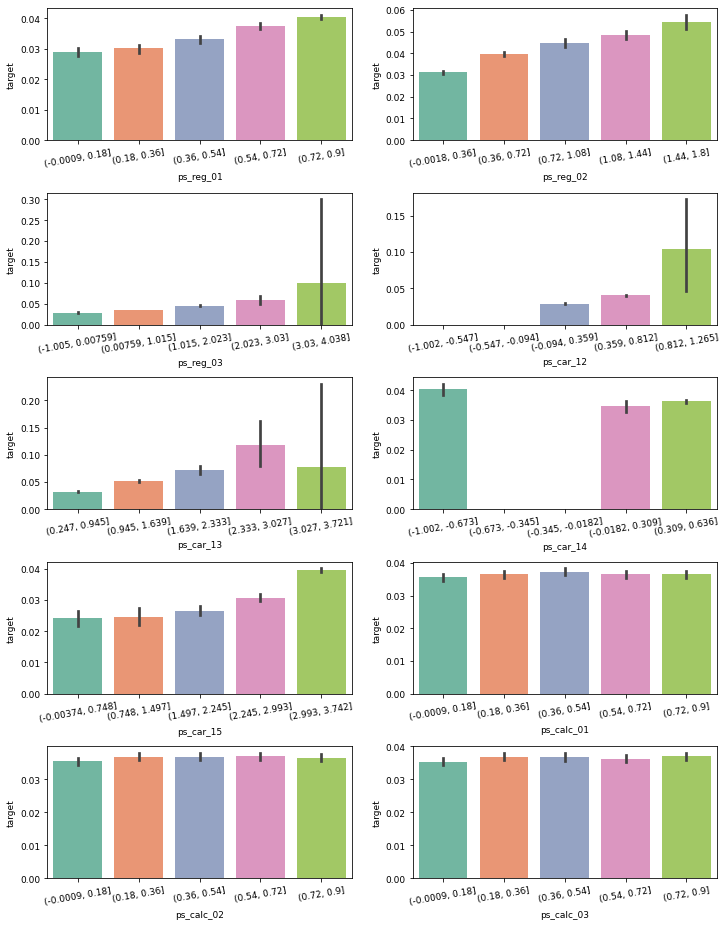

In [11]:
cont_features = summary.loc[summary['데이터 종류']=='연속형'].index

plt.figure(figsize=(12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    
    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax);
    ax.tick_params(axis='x', labelrotation=10)

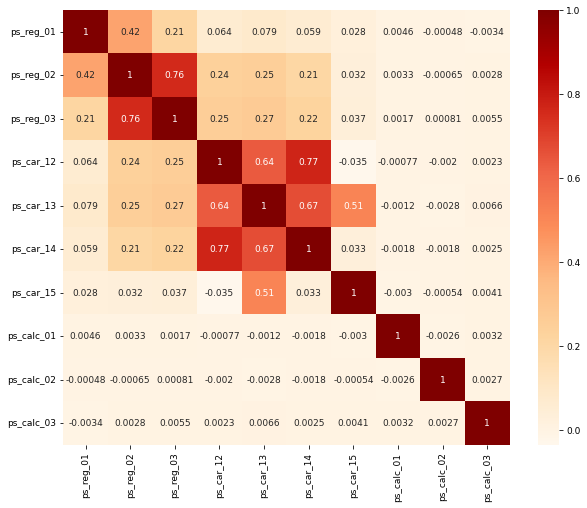

In [12]:
train_copy = train_copy.dropna()

plt.figure(figsize=(10,8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd');

## 8.3 베이스라인 모델

In [60]:
import pandas as pd

path = 'data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(path + "train.csv", index_col='id')
test = pd.read_csv(path + "test.csv", index_col='id')
submission = pd.read_csv(path + "sample_submission.csv", index_col='id')

print(train.shape, test.shape)

(595212, 58) (892816, 57)


### 8.3.1 피쳐 엔지니어링

In [61]:
# 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1) # 인코딩은 타겟 제외

all_features = all_data.columns

In [62]:
# 명목형 피쳐 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

In [63]:
# 필요없는 피쳐 제거
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 
                          'calc' not in feature and
                          feature not in drop_features
                         )]

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format = 'csr')

In [64]:
# 데이터 나누기
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

### 8.3.2 평가지표 계산 함수 작성
- 지니계수 : 예측값을 크기순으로 구하여서 로렌츠 곡선을 구하고, 완전 균등 (삼각형) 대비 면적 계산

In [65]:
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1/n_samples, 1, n_samples)
    
    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)
    
    # 2) 예측이 완벽할 떄 지니계수
    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)
    
    # 정규화
    return G_pred / G_true

# LightGBM용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    
    return 'gini', eval_gini(labels, preds), True

### 8.3.3 모델 훈련 및 성능 검증
- OOF : K 폴드 교차검증을 수행하면서, 각 폴드마다 테스트 데이터로 예측하는 방식. 각 폴드별 모델로 여러 번 예측해 평균 => 과대적합 방지 및 앙상블
1) 전체 K 폴드로 데이터 나눔
2) K-1개 폴드 데이터로 모델 훈련 후 검증데이터 타깃 확률 예측 & 전체 테스트 데이터로도 타깃 확률 예측
3) K개 그룹 검증 데이터로 예측한 확률을 훈련 데이터 실제 타깃값과 비교해 성능 평가점수 계산
4) 테스트 데이터로 구한 K개 예측 확률의 평균을 구함

In [22]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

params = {'objective' : 'binary', 'learning_rate' : 0.01, 'force_row_wise':True, 'random_state':0}

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params=params, train_set=dtrain, num_boost_round=1000,
                         valid_sets=dvalid, feval=gini, early_stopping_rounds=100, verbose_eval=100)
    
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} Gini index: {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0'

In [23]:
print("oof valid data gini index: ", eval_gini(y, oof_val_preds))

oof valid data gini index:  0.2804995714877777


### 8.3.4 예측 및 결과 제출

In [24]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

## 8.4 성능 개선 
### 8.4.1 추가 피쳐 엔지니어링
- 파생피쳐 추가
1) 한 데이터가 가진 결측값 갯수 : -1의 갯수
2) ind 분류의 피쳐값 연결
3) 명목형 피쳐의 고윳값 별 갯수

In [66]:
import pandas as pd

path = 'data/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(path + "train.csv", index_col='id')
test = pd.read_csv(path + "test.csv", index_col='id')
submission = pd.read_csv(path + "sample_submission.csv", index_col='id')

print(train.shape, test.shape)

(595212, 58) (892816, 57)


In [67]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

In [68]:
# 명목형 피쳐 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

In [69]:
# 파생피쳐 추가
all_data['num_missing'] = (all_data == -1).sum(axis=1)

# 명목형 피쳐(이후 원핫 인코딩), calc 피쳐(필요없는 피쳐) 제외
remaining_features = [feature for feature in all_features if ('cat' not in feature and 'calc' not in feature)]

remaining_features.append('num_missing')

In [70]:
# mix_ind 생성 : 명목형 피쳐 고윳값 갯수 용
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True

for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) +'_'

all_data['mix_ind']        

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [71]:
# 명목형 피쳐의 고윳값 별 개수
cat_count_features = []

for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x : val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')
    
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [72]:
# 피쳐 엔지니어링 데이터 모두 합치기
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features + cat_count_features].drop(drop_features, axis=1)
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining), encoded_cat_matrix], format='csr')

In [73]:
# 데이터 나누기
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

### 8.4.2 하이퍼파라미터 최적화
- 베이지안 최적화

In [74]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

# 하이퍼 파라미터 범위 최적화
param_bounds = {
    'learning_rate' : (0.001, 0.01),
    'num_leaves' : (30, 40),
    'lambda_l1' : (0.7, 0.9),
    'lambda_l2' : (0.9, 1),
    'feature_fraction' : (0.6, 0.7),
    'bagging_fraction' : (0.6, 0.9),
    'min_child_samples' : (6, 10),
    'min_child_weight' : (10, 40),
}

fixed_params = {
    'objective' : 'binary',
    'bagging_freq' : 1,
    'force_row_wise' : True,
    'random_state' : 1991
}

In [75]:
# 베이지안 최적화용 평가지표 계산 함수
def eval_function(learning_rate, num_leaves, lambda_l1, lambda_l2, feature_fraction,
                 bagging_fraction, min_child_samples, min_child_weight):
    params = {
        'learning_rate' : learning_rate,
        'num_leaves' : int(round(num_leaves)),
        'lambda_l1' : lambda_l1,
        'lambda_l2' : lambda_l2,
        'feature_fraction' : feature_fraction,
        'bagging_fraction' : bagging_fraction,
        'min_child_samples' : int(round(min_child_samples)),
        'min_child_weight' : min_child_weight,
        'feature_pre_filter' : False,
        }
    
    params.update(fixed_params)
    
    print("하이퍼 파라미터: ", params)
    
    lgb_model = lgb.train(params = params,
                         train_set=bayes_dtrain,
                         num_boost_round=2500,
                         valid_sets=bayes_dvalid,
                         feval=gini,
                         early_stopping_rounds=300,
                         verbose_eval=False)
    
    preds = lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, preds)
    print(f"Gini index: {gini_score}\n")
    
    return gini_score

In [76]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
하이퍼 파라미터:  {'learning_rate': 0.004812893194050143, 'num_leaves': 39, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 9, 'min_child_weight': 23.127616337880774, 'feature_pre_filter': False, 'objective': 'binary', 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Gini index: 0.28484707370

[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Gini index: 0.2849373792648916

| 9         | 0.2849    | 0.696     | 0.6913    | 0.8571    | 0.9822    | 0.009218  | 9.063     | 20.01     | 31.57     |


In [77]:
max_params = optimizer.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

max_params.update(fixed_params)
max_params

{'bagging_fraction': 0.7763145220620449,
 'feature_fraction': 0.6131651500546607,
 'lambda_l1': 0.7280274846110852,
 'lambda_l2': 0.9067661676778794,
 'learning_rate': 0.0097769937118953,
 'min_child_samples': 9,
 'min_child_weight': 28.264377607173515,
 'num_leaves': 31,
 'objective': 'binary',
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

### 8.4.3 모델 훈련 및 성능 검증
- 베이지안 최적화는 찾아낸 하이퍼 파라미터로 다시 훈련 필요


In [78]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds_lgb = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print("#"*40, f'Fold {idx+1} / Fold {folds.n_splits}', '#'*40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params=max_params,
                          train_set=dtrain,
                          num_boost_round=2500,
                          valid_sets=dvalid,
                          feval=gini,
                          early_stopping_rounds=300,
                          verbose_eval=100)
    
    oof_test_preds_lgb += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'Fold {idx+1} gini index: {gini_score}\n')

######################################## Fold 1 / Fold 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.1533	valid_0's gini: 0.272232
[200]	valid_0's binary_logloss: 0.152344	valid_0's gini: 0.280749
[300]	valid_0's binary_logloss: 0.151933	valid_0's gini: 0.286513
[400]	valid_0's binary_logloss: 0.151702	valid_0's gini: 0.290844
[500]	valid_0's binary_logloss: 0.151574	valid_0's gini: 0.293602
[600]	valid_0's binary_logloss: 0.151507	valid_0's gini: 0.294985
[700]	valid_0's binary_logloss: 0.151461	valid_0's gini: 0.296042
[800]	valid_0's binary_logloss: 0.151428	vali

In [79]:
print("OOF valid data gini index: ", eval_gini(y, oof_val_preds))

OOF valid data gini index:  0.2887538111290829


## 8.5 성능개선 : XGBoost
- 결정트리 직렬 배치

### 8.5.1 피쳐 엔지니어링
- XGBoost 용 지니계수 계산 함수는 반환값이 두 개 / "평가 점수가 높으면 좋은지 여부"는 XGBoost 모델 객체의 train method에 따로 전달 필요


In [33]:
# XGBoost용 Gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

### 8.5.2 하이퍼 파라미터 최적화

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

## 파라미터 범위 설정
param_bounds = {
    'max_depth' : (4,8),
    'subsample' : (0.6, 0.9),
    'colsample_bytree' : (0.7, 1.0),
    'min_child_weight' : (5, 7),
    'gamma' : (8,11),
    'reg_alpha' : (7,9),
    'reg_lambda' : (1.1, 1.5),
    'scale_pos_weight' : (1.4, 1.6)
}

fixed_params = {'objective' : 'binary:logistic',
               'learning_rate': 0.02,
               'random_state': 1991}

In [35]:
# 평가지표 계산 함수
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                  gamma, reg_alpha, reg_lambda, scale_pos_weight):
    
    params = {
        'max_depth' : int(round(max_depth)),
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,
        'min_child_weight' : min_child_weight,
        'gamma' : gamma,
        'reg_alpha' : reg_alpha,
        'reg_lambda' : reg_lambda,
        'scale_pos_weight' : scale_pos_weight
    }
    
    params.update(fixed_params)
    
    print("Hyperparameters : ", params)
    
    xgb_model = xgb.train(params=params,
                         dtrain=bayes_dtrain,
                         num_boost_round=2000,
                         evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=False,
                         )
    best_iter = xgb_model.best_iteration
    
    preds = xgb_model.predict(bayes_dvalid, iteration_range=(0,best_iter))
    
    gini_score = eval_gini(y_valid, preds)
    print(f"Gini index: {gini_score}\n")
    
    return gini_score

In [36]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)
optimizer.maximize(init_points=3, n_iter=6)

max_params = optimizer.max['params']
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params.update(fixed_params)
max_params

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
Hyperparameters :  {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'gamma': 10.14556809911726, 'reg_alpha': 7.84730959867781, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.28350336357770883

| 1         | 0.2835    | 0.8646    | 10.15     | 6.411     | 6.09      | 7.847     | 1.358     | 1.488     | 0.8675    |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.6261387899104622, 'colsample_bytree': 0.9890988281503088, 'min_child_weight': 6.0577898395058085, 'gamma': 9.150324556477333, 'reg_alpha': 8.136089122187865, 'reg_lambda': 1.4702386553170643, 'scale_pos_weight': 1.4142072116395774, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
Gini index: 0.2849297934849036

| 2         | 0.2849    | 0.9891    | 9.15      | 7.167     | 6.058     | 8.136     | 1.47      | 1.414     | 0.6261    |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.8341587528859367, 'colsample_bytree': 0.7060655192320977, 'min_child_weight': 6.7400242964936385, 'gamma': 10.497859536643814, 'reg_alpha': 8.957236684465528, 'reg_lambda': 1.4196634256866894, 'scale_pos_weight': 1.4922958724505864, 'objective': 'binary:logistic', 'learning_rate'

/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.28396187464615036

| 4         | 0.284     | 0.8843    | 10.45     | 6.838     | 6.494     | 8.552     | 1.381     | 1.423     | 0.7002    |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.8535233675350644, 'colsample_bytree': 0.92975858050776, 'min_child_weight': 6.249564429359247, 'gamma': 9.95563546750357, 'reg_alpha': 8.411512219837842, 'reg_lambda': 1.424460008293778, 'scale_pos_weight': 1.5416807226581535, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.28431098631289964

| 5         | 0.2843    | 0.9298    | 9.956     | 6.809     | 6.25      | 8.412     | 1.424     | 1.542     | 0.8535    |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.8381153840824652, 'colsample_bytree': 0.9928413933037369, 'min_child_weight': 5.872227179828346, 'gamma': 9.17540859904044, 'reg_alpha': 8.186470561435932, 'reg_lambda': 1.406839837905084, 'scale_pos_weight': 1.4926793890570365, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.28478904410866623

| 6         | 0.2848    | 0.9928    | 9.175     | 7.216     | 5.872     | 8.186     | 1.407     | 1.493     | 0.8381    |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 6.253950478086777, 'gamma': 8.751672124478164, 'reg_alpha': 8.688934856197987, 'reg_lambda': 1.5, 'scale_pos_weight': 1.505793690903486, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.2848464550384473

| 7         | 0.2848    | 1.0       | 8.752     | 7.043     | 6.254     | 8.689     | 1.5       | 1.506     | 0.6       |
Hyperparameters :  {'max_depth': 8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 6.409958930010249, 'gamma': 8.47809783399706, 'reg_alpha': 7.99086902060531, 'reg_lambda': 1.5, 'scale_pos_weight': 1.4, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.28408873023771897

| 8         | 0.2841    | 1.0       | 8.478     | 7.714     | 6.41      | 7.991     | 1.5       | 1.4       | 0.6       |
Hyperparameters :  {'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 5.7926430329849685, 'gamma': 8.786202294659542, 'reg_alpha': 8.356154592021232, 'reg_lambda': 1.5, 'scale_pos_weight': 1.4, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


Gini index: 0.2851920447359164

| 9         | 0.2852    | 1.0       | 8.786     | 6.552     | 5.793     | 8.356     | 1.5       | 1.4       | 0.6       |


{'colsample_bytree': 1.0,
 'gamma': 8.786202294659542,
 'max_depth': 7,
 'min_child_weight': 5.7926430329849685,
 'reg_alpha': 8.356154592021232,
 'reg_lambda': 1.5,
 'scale_pos_weight': 1.4,
 'subsample': 0.6,
 'objective': 'binary:logistic',
 'learning_rate': 0.02,
 'random_state': 1991}

### 8.5.3 모델 훈련 및 성능 검증

In [38]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds_xgb = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    print("#"*40, f'Fold {idx+1} / Fold {folds.n_splits}', '#'*40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)
    
    xgb_model = xgb.train(params=max_params,
                          dtrain=dtrain,
                         num_boost_round=2000,
                         evals=[(dvalid, 'valid')],
                         maximize=True,
                         feval=gini,
                         early_stopping_rounds=200,
                         verbose_eval=100)
    
    best_iter = xgb_model.best_iteration
    
    oof_test_preds_xgb += xgb_model.predict(dtest, iteration_range=(0, best_iter))/folds.n_splits
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range=(0, best_iter))
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'Fold {idx+1} gini index: {gini_score}\n')

######################################## Fold 1 / Fold 5 ########################################


/Users/klee30810/miniconda3/envs/adp_class/lib/python3.7/site-packages/xgboost/training.py:36: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  "`feval` is deprecated, use `custom_metric` instead.  They have "


[0]	valid-logloss:0.67663	valid-gini:0.14390
[100]	valid-logloss:0.19042	valid-gini:0.24769
[200]	valid-logloss:0.15742	valid-gini:0.27886
[300]	valid-logloss:0.15425	valid-gini:0.28966
[400]	valid-logloss:0.15374	valid-gini:0.29421
[500]	valid-logloss:0.15359	valid-gini:0.29674
[600]	valid-logloss:0.15356	valid-gini:0.29774
[700]	valid-logloss:0.15350	valid-gini:0.29880
[800]	valid-logloss:0.15350	valid-gini:0.29951
[900]	valid-logloss:0.15347	valid-gini:0.29994
[1000]	valid-logloss:0.15347	valid-gini:0.30000
[1100]	valid-logloss:0.15346	valid-gini:0.30008
[1164]	valid-logloss:0.15345	valid-gini:0.29998
Fold 1 gini index: 0.3001994636711912

######################################## Fold 2 / Fold 5 ########################################
[0]	valid-logloss:0.67663	valid-gini:0.12176
[100]	valid-logloss:0.19053	valid-gini:0.23575
[200]	valid-logloss:0.15774	valid-gini:0.26337
[300]	valid-logloss:0.15469	valid-gini:0.27314
[400]	valid-logloss:0.15421	valid-gini:0.27821
[500]	valid-loglos

In [39]:
print("OOF valid data gini index: ", eval_gini(y, oof_val_preds))

OOF valid data gini index:  0.2892965624995102


## 8.6 LightGBM & XGBoost 앙상블
- 앙상블 : 각 모델의 예측값이 거의 같다면 효과 없음, 다양한 모델 앙상블 필요

In [80]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5

submission['target'] = oof_test_preds
submission.to_csv('submission.csv')

# 핵심 요약
1. 머신러닝 평가지표로서의 정규화 지니계수는 '예측값에 대한 지니계수 / 예측이 완벽할 때의 지니계수'입니다. 직접 함수 정의 필요
2. 피쳐 요약표는 데이터 성격에 맞게 조금씩 변형
3. missingno 패키지는 결측치 시각화에 유용
4. 결측값 처리 방법 : 결측치가 많다면 해당 피쳐 제거 / 많지 않다면 다른 값으로 대체 / 때로는 결측값이 예측에 도움(이럴 떄는 결측값을 하나의 고유값으로 간주)
5. 피쳐엔지니어링 : 사칙연산, 통계치, 문자열 연결 등 다양한 방법 시도 필요
6. 베이지안 최적화 : 빠르고 효율적으로 최적 파라미터 찾음
7. OOF 예측 : K-Fold를 수행하면서 각 폴드마다 테스트 데이터로 예측하는 방식
8. 앙상블 : 여러 모델에서 얻은 예측결과 결합해 더 좋은 예측값 도출